**1. Download the Dataset**

*Dataset downloaded*  https://drive.google.com/file/d/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy/view

**2. Load the Dataset**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**3. Visualization**

*Univariate Analysis*

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

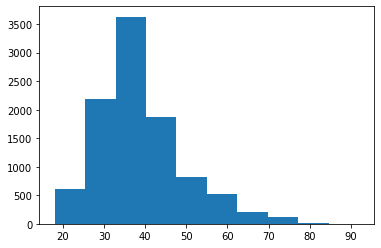

In [3]:
plt.hist(df['Age'])

*Bi - Variate Analysis*

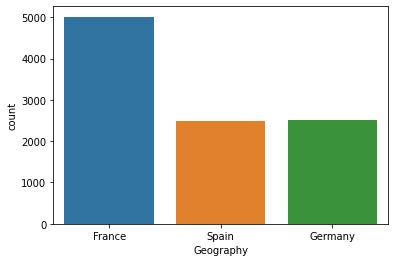

In [4]:
sns.barplot(x='Gender',y='Age',data=df)
sns.countplot(x='Geography',data=df)

*Multi - Variate Analysis*

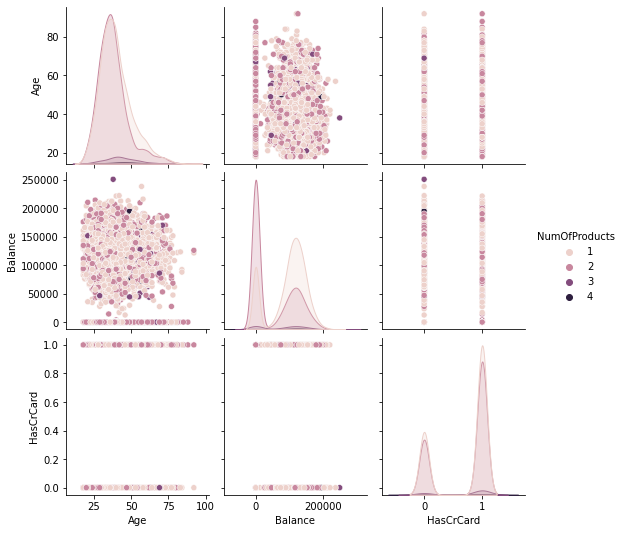

In [5]:
sns.pairplot(data = df[['Age', 'Balance', 'HasCrCard', 'NumOfProducts']],hue='NumOfProducts')

**4. Perform descriptive statistics on the dataset**

*Sum*

In [6]:
df.sum()


RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object

*Axis = 1*

In [7]:
df.sum(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0       15736618.88
1       15844315.44
2       15893456.37
3       15795925.63
4       15943385.92
           ...     
9995    15713313.64
9996    15739522.38
9997    15637370.58
9998    15861138.83
9999    15807478.57
Length: 10000, dtype: float64

*Mean*

In [8]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

*Count*

In [9]:
df.count

<bound method DataFrame.count of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOf

**5. Handle the Missing values**
(no null values)

In [10]:
data = pd.read_csv("Churn_Modelling.csv")
pd.isnull(data["Gender"])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Gender, Length: 10000, dtype: bool

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**6. Find the outliers and replace the outliers**
(no null values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


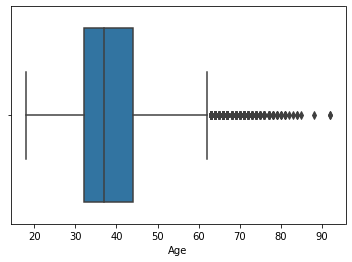

In [12]:
sns.boxplot(df['Age'])

In [13]:
df['Age']=np.where(df['Age']>50,40,df['Age'])
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


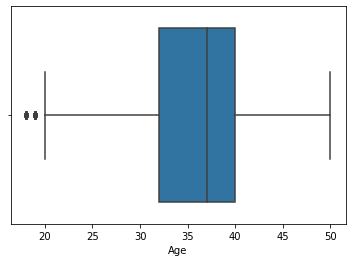

In [14]:
sns.boxplot(df['Age'])


In [15]:
df['Age']=np.where(df['Age']<20,35,df['Age'])
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

**7. Check for Categorical columns and Perform encoding**

In [16]:
pd.get_dummies(df, columns=["Gender", "Age"], prefix=["Age", "Gender"]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Gender_41,Gender_42,Gender_43,Gender_44,Gender_45,Gender_46,Gender_47,Gender_48,Gender_49,Gender_50
0,1,15634602,Hargrave,619,France,2,0.00,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,1,83807.86,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,8,159660.80,3,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,15701354,Boni,699,France,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,2,125510.82,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [17]:
df_categorical = df[['Gender', 'Age', 'Geography']]
df_categorical.head()

,Gender,Age,Geography
0,Female,42,France
1,Female,41,Spain
2,Female,42,France
3,Female,39,France
4,Female,43,Spain


In [18]:
print(df['Gender'].unique())
print(df['Geography'].unique())


['Female' 'Male']
['France' 'Spain' 'Germany']


In [19]:
encoder = LabelEncoder()
encoder.fit(df_categorical['Geography'])
values = encoder.transform(df_categorical['Geography'])

In [20]:
print("Before Encoding:", list(df_categorical['Geography'][-10:]))
print("After Encoding:", values[-10:])
print("The inverse from the encoding result:",encoder.inverse_transform(values[-10:]))

Before Encoding: ['Germany', 'France', 'Spain', 'France', 'France', 'France', 'France', 'France', 'Germany', 'France']
After Encoding: [1 0 2 0 0 0 0 0 1 0]
The inverse from the encoding result: ['Germany' 'France' 'Spain' 'France' 'France' 'France' 'France' 'France'
 'Germany' 'France']


**8. Split the data into dependent and independent variables**

*Splitting the Dataset into the Independent Feature Matrix*

In [21]:
X = df.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


*Extracting the Dataset to Get the Dependent Vector*

In [22]:
Y = df.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


**9. Scale the Independent variables** 

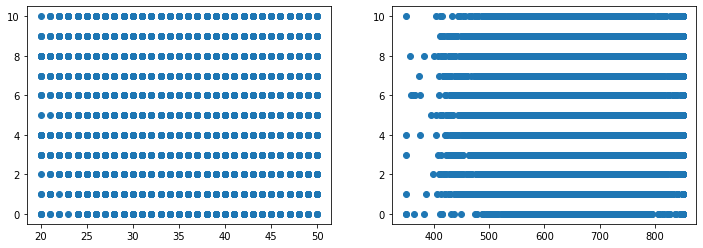

In [23]:
x = df[['Age', 'CreditScore']].values
y = df['Tenure'].values
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].scatter(x[:,0], y)
ax[1].scatter(x[:,1], y)
plt.show()

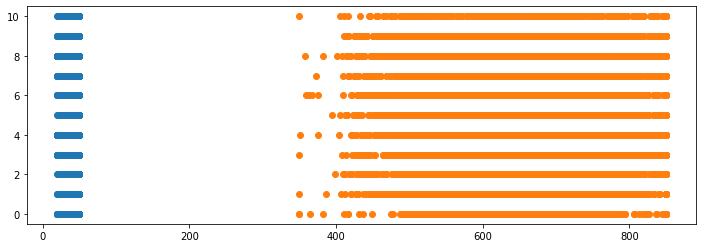

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

**10. Split the data into Training and Testing**

In [25]:
train_size=0.8
X = df.drop(columns = ['Tenure']).copy()
y = df['Tenure']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(8000, 13)
(8000,)
(1000, 13)
(1000,)
(1000, 13)
(1000,)


(None, None)